In [1]:
import seaborn as sns
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import pandas as pd

from scipy import stats
from scipy.stats import shapiro

In [2]:
all_targets = pd.read_csv('../data/0&1/sampled_sum_targets_with_panic.csv')

In [3]:
all_targets

,comp_week,comp_wend,text_week,text_wend,tv_week,tv_wend,dep_score,dep_thoughts,has_dep_diag,prim_diag,secd_diag,panic_score,total
0,3,3,2,3,1,2,1.0,1.0,0,1.0,0.0,0.0,3.0
1,2,3,2,2,3,2,1.0,1.0,0,1.0,0.0,0.0,3.0
2,2,2,0,0,3,3,0.0,1.0,0,1.0,0.0,0.0,2.0
3,3,3,3,3,3,3,1.0,1.0,1,1.0,1.0,1.0,6.0
4,3,3,0,0,3,3,1.0,1.0,0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,1,1,1,2,2,2,1.0,1.0,0,0.0,0.0,0.0,2.0
224,3,2,3,3,2,3,0.0,1.0,0,0.0,0.0,0.0,1.0
225,2,3,1,1,2,2,1.0,1.0,1,1.0,1.0,0.0,5.0
226,2,3,3,3,2,3,1.0,1.0,1,1.0,1.0,1.0,6.0


In [4]:
all_targets_copied = all_targets.copy()
total = all_targets_copied['total']
del all_targets_copied['total']

In [5]:
all_targets_copied

,comp_week,comp_wend,text_week,text_wend,tv_week,tv_wend,dep_score,dep_thoughts,has_dep_diag,prim_diag,secd_diag,panic_score
0,3,3,2,3,1,2,1.0,1.0,0,1.0,0.0,0.0
1,2,3,2,2,3,2,1.0,1.0,0,1.0,0.0,0.0
2,2,2,0,0,3,3,0.0,1.0,0,1.0,0.0,0.0
3,3,3,3,3,3,3,1.0,1.0,1,1.0,1.0,1.0
4,3,3,0,0,3,3,1.0,1.0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
223,1,1,1,2,2,2,1.0,1.0,0,0.0,0.0,0.0
224,3,2,3,3,2,3,0.0,1.0,0,0.0,0.0,0.0
225,2,3,1,1,2,2,1.0,1.0,1,1.0,1.0,0.0
226,2,3,3,3,2,3,1.0,1.0,1,1.0,1.0,1.0


In [6]:
total.value_counts()

2.0    38
5.0    38
1.0    38
3.0    38
4.0    38
6.0    38
Name: total, dtype: int64

In [7]:
X = all_targets_copied.copy()

Text(0.5, 1.0, 'Screen Time and Mental Health Correlation Matrix')

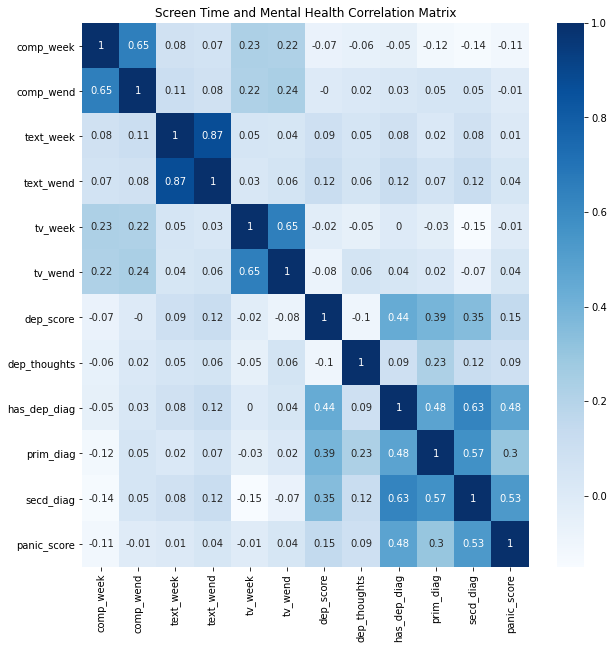

In [8]:
X_corr = X.corr(method='spearman')
X_corr = round(X_corr,2)

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(X_corr, annot=True, cmap="Blues")
ax.set_title('Screen Time and Mental Health Correlation Matrix')

Text(0.5, 1.0, 'Screen Time and Mental Health P values')

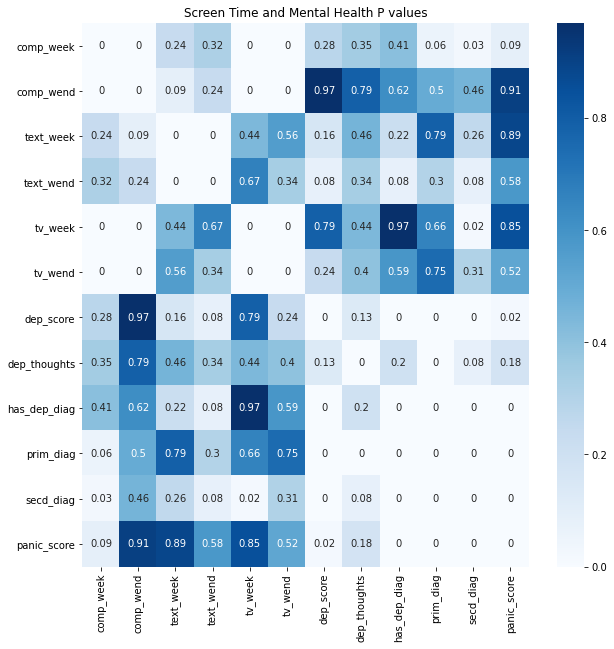

In [9]:
p_values = [[] for i in range(12)]
all_vars = [X.comp_week, X.comp_wend, X.text_week, X.text_wend, X.tv_week, X.tv_wend, X.dep_score, X.dep_thoughts, X.has_dep_diag, X.prim_diag, X.secd_diag, X.panic_score]

# 0 --> comp_week and others 
# 1 --> comp_wend and others 
# .
# 11 --> panic_score and others 

for i in range(len(p_values)):
    for j in range(len(p_values)):
        p_values[i].append( round(stats.spearmanr(all_vars[i], all_vars[j])[1], 2) )
        
labels = ['comp_week', 'comp_wend', 'text_week', 'text_wend', 'tv_week', 'tv_wend', 'dep_score', 'dep_thoughts', 'has_dep_diag', 'prim_diag', 'secd_diag', 'panic_score']

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(p_values, annot=True, cmap="Blues", xticklabels=labels, yticklabels=labels)
ax.set_title('Screen Time and Mental Health P values')

In [10]:
# p-value가 0.05보다 작으므로 귀무가설을 기각, 
# 즉 데이터는 정규성을 만족한다고 볼 수 없습니다.

all_vars = [X.comp_week, X.comp_wend, X.text_week, X.text_wend, X.tv_week, X.tv_wend, X.dep_score, X.dep_thoughts, X.has_dep_diag, X.prim_diag, X.secd_diag, X.panic_score]

for i in range(len(all_vars)):
    stat, p = shapiro(all_vars[i])

    alpha = 0.05
    if p > alpha:
        print(labels[i], ': Sample looks Gaussian (fail to reject H0)')
    else:
        print(labels[i], ': Sample does not look Gaussian (reject H0)')

comp_week : Sample does not look Gaussian (reject H0)
comp_wend : Sample does not look Gaussian (reject H0)
text_week : Sample does not look Gaussian (reject H0)
text_wend : Sample does not look Gaussian (reject H0)
tv_week : Sample does not look Gaussian (reject H0)
tv_wend : Sample does not look Gaussian (reject H0)
dep_score : Sample does not look Gaussian (reject H0)
dep_thoughts : Sample does not look Gaussian (reject H0)
has_dep_diag : Sample does not look Gaussian (reject H0)
prim_diag : Sample does not look Gaussian (reject H0)
secd_diag : Sample does not look Gaussian (reject H0)
panic_score : Sample does not look Gaussian (reject H0)
